In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:
exchange_path = sorted(glob.glob('./../data/exchange/*'))
exchange = pd.read_csv(exchange_path[5])
exchange_CAD = exchange.iloc[22:]
exchange_CAD

,Unnamed: 0,date,buy,standard
22,22,2022-03-31,986.89,970.15
23,23,2022-03-30,988.16,976.56
24,24,2022-03-29,993.60,979.11
25,25,2022-03-28,1000.83,975.93
26,26,2022-03-25,990.37,973.30
...,...,...,...,...
4617,4617,2003-09-30,869.25,850.17
4618,4618,2003-09-29,862.23,850.62
4619,4619,2003-09-26,867.33,853.30
4620,4620,2003-09-25,870.15,853.83


In [3]:
interest_path = sorted(glob.glob('./../data/interest/*'))
interest = pd.read_csv(interest_path[0])
interest_CAD = interest.iloc[26:]
interest_CAD

,Unnamed: 0,date,interest,change
26,26,2022-03-31,1.016,-3.33
27,27,2022-03-30,1.051,-6.16
28,28,2022-03-29,1.120,8.74
29,29,2022-03-28,1.030,3.83
30,30,2022-03-27,0.992,13.11
...,...,...,...,...
5682,4995,2003-09-30,4.920,1.65
5683,4996,2003-09-29,4.840,-0.31
5684,4997,2003-09-26,4.855,0.21
5685,4998,2003-09-25,4.845,-0.72


In [4]:
a = exchange_CAD['buy'].iloc[1:].to_numpy()
a

array([ 988.16,  993.6 , 1000.83, ...,  867.33,  870.15,  865.35])

In [5]:
b = exchange_CAD['buy'].iloc[:len(exchange_CAD)-1].to_numpy()
b

array([986.89, 988.16, 993.6 , ..., 862.23, 867.33, 870.15])

In [6]:
ex = (b-a)/a*100
exchange_CAD = exchange_CAD.drop(4621)
exchange_CAD['ex'] = ex # % 데이터
exchange_CAD['ex'].isnull().sum()
exchange_CAD

,Unnamed: 0,date,buy,standard,ex
22,22,2022-03-31,986.89,970.15,-0.128522
23,23,2022-03-30,988.16,976.56,-0.547504
24,24,2022-03-29,993.60,979.11,-0.722400
25,25,2022-03-28,1000.83,975.93,1.056171
26,26,2022-03-25,990.37,973.30,-0.249786
...,...,...,...,...,...
4616,4616,2003-10-01,870.67,851.13,0.163359
4617,4617,2003-09-30,869.25,850.17,0.814168
4618,4618,2003-09-29,862.23,850.62,-0.588011
4619,4619,2003-09-26,867.33,853.30,-0.324082


In [7]:
import datetime
exchange_CAD['dt'] = pd.to_datetime(exchange_CAD['date'])
exchange_CAD['dt'] = exchange_CAD['dt'].dt.strftime('%Y-%m')
exchange_CAD

,Unnamed: 0,date,buy,standard,ex,dt
22,22,2022-03-31,986.89,970.15,-0.128522,2022-03
23,23,2022-03-30,988.16,976.56,-0.547504,2022-03
24,24,2022-03-29,993.60,979.11,-0.722400,2022-03
25,25,2022-03-28,1000.83,975.93,1.056171,2022-03
26,26,2022-03-25,990.37,973.30,-0.249786,2022-03
...,...,...,...,...,...,...
4616,4616,2003-10-01,870.67,851.13,0.163359,2003-10
4617,4617,2003-09-30,869.25,850.17,0.814168,2003-09
4618,4618,2003-09-29,862.23,850.62,-0.588011,2003-09
4619,4619,2003-09-26,867.33,853.30,-0.324082,2003-09


In [1]:
inflation = pd.read_excel('./../data/2차/inflation/inflation.xlsx')
inflation

NameError: name 'pd' is not defined

In [9]:
liquidity = pd.read_excel('./../data/2차/Liquidity/canada_Liquidity.xlsx')
liquidity = liquidity.iloc[[6,7], 48:]
liquidity

,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,...,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271
6,2003M08,2003M09,2003M10,2003M11,2003M12,2004M01,2004M02,2004M03,2004M04,2004M05,...,2021M06,2021M07,2021M08,2021M09,2021M10,2021M11,2021M12,2022M01,2022M02,2022M03
7,35224.651622,36610.723079,35788.592264,36054.079623,36222.100799,36323.415551,35938.921518,36365.514774,35064.356252,35933.267219,...,89053.334543,90198.499889,106538.505867,106175.639454,104169.32078,103626.563078,106615.11957,104402.24878,102889.214424,103763.679863


In [10]:
liquidity.iloc[0, 1:]
b = liquidity.iloc[1,1:].to_numpy()
a = liquidity.iloc[1, :len(liquidity.columns)-1].to_numpy()
b, a

(array([36610.7230791447, 35788.5922638138, 36054.079623491096,
        36222.1007993034, 36323.4155511149, 35938.921517608396,
        36365.514774029405, 35064.3562519509, 35933.2672193344,
        35373.481271214405, 35154.463410332, 35843.575708309196,
        36215.2515931239, 36413.990601160105, 34032.191900559395,
        34428.643087875396, 34544.3325654839, 35514.502489482904,
        36199.3982172264, 35556.385119772596, 34989.561274412205,
        34876.105243225305, 33282.6689654371, 34251.748995632195,
        33547.292849792, 34163.3680999335, 34144.8671152696,
        32962.124276077, 32896.903204591705, 32623.387772995997,
        35966.2632597398, 35645.983310801596, 35613.0054447953,
        35845.663402193, 36321.8375346482, 35785.116344599504,
        35952.397829729794, 35576.4359380041, 36407.7520693555,
        34993.800647193704, 35836.7918777717, 36237.4695046624,
        39230.5962169836, 40109.021411729205, 40024.26189219081,
        39341.2475713, 40229.9041

In [11]:
date = liquidity.iloc[0, 1:]
b = liquidity.iloc[1,1:].to_numpy()
a = liquidity.iloc[1, :len(liquidity.columns)-1].to_numpy()
li = (b-a)/a*100
li_df = pd.DataFrame({'date' : date, 'li': li})
li_df

,date,li
Unnamed: 49,2003M09,3.934947
Unnamed: 50,2003M10,-2.245601
Unnamed: 51,2003M11,0.741821
Unnamed: 52,2003M12,0.466025
Unnamed: 53,2004M01,0.279704
...,...,...
Unnamed: 267,2021M11,-0.521034
Unnamed: 268,2021M12,2.883968
Unnamed: 269,2022M01,-2.075569
Unnamed: 270,2022M02,-1.449235


In [12]:
data = inflation.iloc[3, 646:]
index = inflation.iloc[1, 646:]
index = inflation.iloc[1, 646:]
inflation_CAD = pd.DataFrame({'index' : index, 'liquidity' : li_df['li'].to_list(), 'inflation': data})
inflation_CAD['dt'] = inflation_CAD['index'].str[:4] + '-' + inflation_CAD['index'].str[5:]
inflation_CAD['dt'] = pd.to_datetime(inflation_CAD['dt'])
inflation_CAD['dt'] = inflation_CAD['dt'].dt.strftime('%Y-%m')
inflation_CAD

,index,liquidity,inflation,dt
Unnamed: 646,2003M09,3.934947,0.194363,2003-09
Unnamed: 647,2003M10,-2.245601,-0.29098,2003-10
Unnamed: 648,2003M11,0.741821,0.291829,2003-11
Unnamed: 649,2003M12,0.466025,0.096993,2003-12
Unnamed: 650,2004M01,0.279704,0.096899,2004-01
...,...,...,...,...
Unnamed: 864,2021M11,-0.521034,0.208478,2021-11
Unnamed: 865,2021M12,2.883968,-0.138696,2021-12
Unnamed: 866,2022M01,-2.075569,0.902778,2022-01
Unnamed: 867,2022M02,-1.449235,1.032347,2022-02


In [13]:
exchange_CAD = exchange_CAD.reset_index(drop=True)
exchange_CAD = exchange_CAD.drop('Unnamed: 0', axis = 1)
exchange_CAD

,date,buy,standard,ex,dt
0,2022-03-31,986.89,970.15,-0.128522,2022-03
1,2022-03-30,988.16,976.56,-0.547504,2022-03
2,2022-03-29,993.60,979.11,-0.722400,2022-03
3,2022-03-28,1000.83,975.93,1.056171,2022-03
4,2022-03-25,990.37,973.30,-0.249786,2022-03
...,...,...,...,...,...
4594,2003-10-01,870.67,851.13,0.163359,2003-10
4595,2003-09-30,869.25,850.17,0.814168,2003-09
4596,2003-09-29,862.23,850.62,-0.588011,2003-09
4597,2003-09-26,867.33,853.30,-0.324082,2003-09


In [14]:
exchange_CAD.iloc[:,4]

0       2022-03
1       2022-03
2       2022-03
3       2022-03
4       2022-03
         ...   
4594    2003-10
4595    2003-09
4596    2003-09
4597    2003-09
4598    2003-09
Name: dt, Length: 4599, dtype: object

In [15]:
inflation_CAD_list = inflation_CAD['inflation'].to_list()
liquidity_CAD_list = inflation_CAD['liquidity'].to_list()
inflation_index_list = inflation_CAD['dt'].to_list()
exchange_CAD['price'] = 'nan'
exchange_CAD['m1'] = 'nan'
for i in range(len(exchange_CAD)):
    try:
        exchange_CAD['price'][i] = inflation_CAD_list[inflation_index_list.index(exchange_CAD.iloc[i,4])]
        exchange_CAD['m1'][i] = liquidity_CAD_list[inflation_index_list.index(exchange_CAD.iloc[i,4])]
    except: pass
exchange_CAD.head(50)

/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_991/4155504425.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_CAD['price'][i] = inflation_CAD_list[inflation_index_list.index(exchange_CAD.iloc[i,4])]
/var/folders/v0/twgc0q1d1qnc66ygdv3d817r0000gn/T/ipykernel_991/4155504425.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_CAD['m1'][i] = liquidity_CAD_list[inflation_index_list.index(exchange_CAD.iloc[i,4])]


,date,buy,standard,ex,dt,price,m1
0,2022-03-31,986.89,970.15,-0.128522,2022-03,1.430518,0.84991
1,2022-03-30,988.16,976.56,-0.547504,2022-03,1.430518,0.84991
2,2022-03-29,993.60,979.11,-0.722400,2022-03,1.430518,0.84991
3,2022-03-28,1000.83,975.93,1.056171,2022-03,1.430518,0.84991
4,2022-03-25,990.37,973.30,-0.249786,2022-03,1.430518,0.84991
5,2022-03-24,992.85,964.87,0.877861,2022-03,1.430518,0.84991
6,2022-03-23,984.21,972.03,-0.067014,2022-03,1.430518,0.84991
7,2022-03-22,984.87,963.83,0.172910,2022-03,1.430518,0.84991
8,2022-03-21,983.17,961.08,0.010172,2022-03,1.430518,0.84991
9,2022-03-18,983.07,966.54,0.770847,2022-03,1.430518,0.84991


In [16]:
left = exchange_CAD[['date', 'ex', 'price', 'm1']]
right = interest_CAD[['date', 'change']]
merge_left = pd.merge(left,right, on = 'date', how = 'left', sort = True)
merge_left

,date,ex,price,m1,change
0,2003-09-25,0.554689,0.194363,3.934947,-0.72
1,2003-09-26,-0.324082,0.194363,3.934947,0.21
2,2003-09-29,-0.588011,0.194363,3.934947,-0.31
3,2003-09-30,0.814168,0.194363,3.934947,1.65
4,2003-10-01,0.163359,-0.29098,-2.245601,-2.13
...,...,...,...,...,...
4594,2022-03-25,-0.249786,1.430518,0.84991,7.74
4595,2022-03-28,1.056171,1.430518,0.84991,3.83
4596,2022-03-29,-0.722400,1.430518,0.84991,8.74
4597,2022-03-30,-0.547504,1.430518,0.84991,-6.16


In [17]:
merge_left['change'].isnull().sum()

61

In [18]:
merge_left[merge_left['change'].isnull()]

,date,ex,price,m1,change
64,2003-12-26,1.099840,0.096993,0.466025,NaN
81,2004-01-26,-1.625720,0.096899,0.279704,NaN
133,2004-04-09,-0.991058,0.192493,-3.578001,NaN
134,2004-04-12,-0.191096,0.192493,-3.578001,NaN
143,2004-04-26,-0.442158,0.192493,-3.578001,NaN
...,...,...,...,...,...
2063,2011-12-27,0.086666,-0.578991,0.156061,NaN
2067,2012-01-02,-0.090677,0.415973,0.812824,NaN
2083,2012-01-26,0.317338,0.415973,0.812824,NaN
2638,2014-04-18,-0.105859,0.320513,1.109656,NaN


In [19]:
merge_left = merge_left.dropna()
merge_left['change'].isnull().sum()

0

In [20]:
merge_left

,date,ex,price,m1,change
0,2003-09-25,0.554689,0.194363,3.934947,-0.72
1,2003-09-26,-0.324082,0.194363,3.934947,0.21
2,2003-09-29,-0.588011,0.194363,3.934947,-0.31
3,2003-09-30,0.814168,0.194363,3.934947,1.65
4,2003-10-01,0.163359,-0.29098,-2.245601,-2.13
...,...,...,...,...,...
4594,2022-03-25,-0.249786,1.430518,0.84991,7.74
4595,2022-03-28,1.056171,1.430518,0.84991,3.83
4596,2022-03-29,-0.722400,1.430518,0.84991,8.74
4597,2022-03-30,-0.547504,1.430518,0.84991,-6.16


In [21]:
merge_left = merge_left.set_index('date')
merge_left

,ex,price,m1,change
date,,,,
2003-09-25,0.554689,0.194363,3.934947,-0.72
2003-09-26,-0.324082,0.194363,3.934947,0.21
2003-09-29,-0.588011,0.194363,3.934947,-0.31
2003-09-30,0.814168,0.194363,3.934947,1.65
2003-10-01,0.163359,-0.29098,-2.245601,-2.13
...,...,...,...,...
2022-03-25,-0.249786,1.430518,0.84991,7.74
2022-03-28,1.056171,1.430518,0.84991,3.83
2022-03-29,-0.722400,1.430518,0.84991,8.74


In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [23]:
merge_left['change'].isnull().sum()

0

In [24]:
merge_left.isnull().any()

ex        False
price     False
m1        False
change    False
dtype: bool

In [25]:
merge_left = merge_left.astype('float')

[[0.8778614320114595, -16.85, 1.430517711171658], [-0.24978596968323694, 7.74, 1.430517711171658], [1.0561709260175527, 3.83, 1.430517711171658], [-0.7224004076616426, 8.74, 1.430517711171658], [-0.5475040257649009, -6.16, 1.430517711171658]] -> [-0.12852169689118986]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 5)              180       
                                                                 
 lstm_9 (LSTM)               (None, 5)                 220       
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-18 10:08:47.568241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 10:08:47.760677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/318 [..............................] - ETA: 5:05 - loss: 0.4225

2022-05-18 10:08:47.792109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 10:08:47.833845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 10:08:47.892939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 4s 11ms/step - loss: 0.4639
Epoch 2/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4630
Epoch 3/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4628
Epoch 4/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4627
Epoch 5/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4624
Epoch 6/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4622
Epoch 7/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4623
Epoch 8/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4619
Epoch 9/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4615
Epoch 10/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4609
Epoch 11/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4609
Epoch 12/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4603
Epoch 13/300


318/318 [==============================] - 3s 10ms/step - loss: 0.3286
Epoch 195/300
318/318 [==============================] - 3s 11ms/step - loss: 0.3285
Epoch 196/300
318/318 [==============================] - 3s 11ms/step - loss: 0.3287
Epoch 197/300
318/318 [==============================] - 4s 11ms/step - loss: 0.3274
Epoch 198/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3279
Epoch 199/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3268
Epoch 200/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3270
Epoch 201/300
318/318 [==============================] - 3s 11ms/step - loss: 0.3281
Epoch 202/300
318/318 [==============================] - 4s 12ms/step - loss: 0.3260
Epoch 203/300
318/318 [==============================] - 3s 11ms/step - loss: 0.3263
Epoch 204/300
318/318 [==============================] - 3s 11ms/step - loss: 0.3257
Epoch 205/300
318/318 [==============================] - 3s 11ms/step - loss: 0

2022-05-18 10:25:42.551575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 10:25:42.615203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 10:25:42.650260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


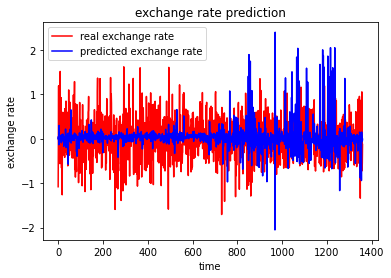

Tomorrow's exchange rate : [-0.00980426] CAD/KRW


In [34]:
dfx = merge_left[['ex', 'change', 'price']] # 통화량 x, 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 3

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001, clipvalue=1.)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -16.85, 1.430517711171658], [-0.24978596968323694, 7.74, 1.430517711171658], [1.0561709260175527, 3.83, 1.430517711171658], [-0.7224004076616426, 8.74, 1.430517711171658], [-0.5475040257649009, -6.16, 1.430517711171658]] -> [-0.12852169689118986]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 5)              180       
                                                                 
 lstm_7 (LSTM)               (None, 5)                 220       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-19 10:35:11.393331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 10:35:11.589609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 10:35:11.637110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 10:35:11.695289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 10:35:11.784764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 4s 11ms/step - loss: 0.4641
Epoch 2/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4636
Epoch 3/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4631
Epoch 4/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4627
Epoch 5/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4626
Epoch 6/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4627
Epoch 7/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4624
Epoch 8/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4625
Epoch 9/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4622
Epoch 10/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4622
Epoch 11/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4618
Epoch 12/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4617
Epoch 13/300


318/318 [==============================] - 3s 10ms/step - loss: 0.3346
Epoch 195/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3347
Epoch 196/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3345
Epoch 197/300
318/318 [==============================] - 3s 11ms/step - loss: 0.3330
Epoch 198/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3324
Epoch 199/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3327
Epoch 200/300
318/318 [==============================] - 3s 11ms/step - loss: 0.3334
Epoch 201/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3318
Epoch 202/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3313
Epoch 203/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3326
Epoch 204/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3311
Epoch 205/300
318/318 [==============================] - 3s 10ms/step - loss: 0

2022-05-19 10:51:29.274855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 10:51:29.349373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 10:51:29.417568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


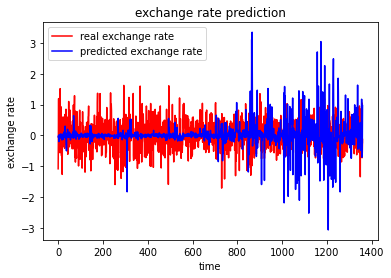

Tomorrow's exchange rate : [0.9661571] CAD/KRW


In [29]:
dfx = merge_left[['ex', 'change', 'price']] # 통화량 x, 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 3

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -16.85, 1.430517711171658], [-0.24978596968323694, 7.74, 1.430517711171658], [1.0561709260175527, 3.83, 1.430517711171658], [-0.7224004076616426, 8.74, 1.430517711171658], [-0.5475040257649009, -6.16, 1.430517711171658]] -> [-0.12852169689118986]
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 5, 5)              180       
                                                                 
 lstm_17 (LSTM)              (None, 5)                 220       
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-18 10:28:15.475955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 10:28:15.666524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/318 [..............................] - ETA: 6:37 - loss: 0.2527

2022-05-18 10:28:15.702581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 10:28:15.754999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 10:28:15.822601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 5s 11ms/step - loss: 0.4640
Epoch 2/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4631
Epoch 3/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4628
Epoch 4/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4625
Epoch 5/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4625
Epoch 6/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4624
Epoch 7/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4623
Epoch 8/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4618
Epoch 9/600
318/318 [==============================] - 3s 11ms/step - loss: 0.4615
Epoch 10/600
318/318 [==============================] - 3s 11ms/step - loss: 0.4612
Epoch 11/600
318/318 [==============================] - 3s 11ms/step - loss: 0.4612
Epoch 12/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4610
Epoch 13/600


318/318 [==============================] - 3s 10ms/step - loss: 0.3313
Epoch 195/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3320
Epoch 196/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3307
Epoch 197/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3303
Epoch 198/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3316
Epoch 199/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3300
Epoch 200/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3292
Epoch 201/600
318/318 [==============================] - 3s 11ms/step - loss: 0.3296
Epoch 202/600
318/318 [==============================] - 4s 12ms/step - loss: 0.3287
Epoch 203/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3315
Epoch 204/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3288
Epoch 205/600
318/318 [==============================] - 3s 11ms/step - loss: 0

318/318 [==============================] - 3s 11ms/step - loss: 0.2973
Epoch 387/600
318/318 [==============================] - 4s 11ms/step - loss: 0.2977
Epoch 388/600
318/318 [==============================] - 3s 11ms/step - loss: 0.2973
Epoch 389/600
318/318 [==============================] - 4s 11ms/step - loss: 0.2975
Epoch 390/600
318/318 [==============================] - 3s 11ms/step - loss: 0.2970
Epoch 391/600
318/318 [==============================] - 3s 11ms/step - loss: 0.2968
Epoch 392/600
318/318 [==============================] - 4s 11ms/step - loss: 0.2969
Epoch 393/600
318/318 [==============================] - 4s 11ms/step - loss: 0.2969
Epoch 394/600
318/318 [==============================] - 3s 11ms/step - loss: 0.2979
Epoch 395/600
318/318 [==============================] - 3s 11ms/step - loss: 0.2969
Epoch 396/600
318/318 [==============================] - 4s 11ms/step - loss: 0.2974
Epoch 397/600
318/318 [==============================] - 3s 11ms/step - loss: 0

318/318 [==============================] - 3s 11ms/step - loss: 0.2839
Epoch 579/600
318/318 [==============================] - 3s 11ms/step - loss: 0.2840
Epoch 580/600
318/318 [==============================] - 4s 12ms/step - loss: 0.2836
Epoch 581/600
318/318 [==============================] - 4s 12ms/step - loss: 0.2840
Epoch 582/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2843
Epoch 583/600
318/318 [==============================] - 3s 11ms/step - loss: 0.2844
Epoch 584/600
318/318 [==============================] - 3s 11ms/step - loss: 0.2843
Epoch 585/600
318/318 [==============================] - 3s 11ms/step - loss: 0.2839
Epoch 586/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2848
Epoch 587/600
318/318 [==============================] - 3s 11ms/step - loss: 0.2851
Epoch 588/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2843
Epoch 589/600
318/318 [==============================] - 3s 11ms/step - loss: 0

2022-05-18 11:01:46.230528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:01:46.314014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:01:46.445085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


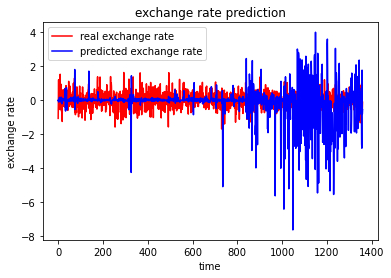

Tomorrow's exchange rate : [-0.56859636] CAD/KRW


In [38]:
dfx = merge_left[['ex', 'change', 'price']] # 통화량 x 반복횟수 600
dfy = dfx[['ex']]

window_size = 5
data_size = 3

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=600, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -16.85, 0.8499097242411886, 1.430517711171658], [-0.24978596968323694, 7.74, 0.8499097242411886, 1.430517711171658], [1.0561709260175527, 3.83, 0.8499097242411886, 1.430517711171658], [-0.7224004076616426, 8.74, 0.8499097242411886, 1.430517711171658], [-0.5475040257649009, -6.16, 0.8499097242411886, 1.430517711171658]] -> [-0.12852169689118986]
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 5, 5)              200       
                                                                 
 lstm_21 (LSTM)              (None, 5)                 220       
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
________________

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-18 11:22:19.625130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:22:19.832435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:22:19.955798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:22:20.049901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:22:20.164070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 5s 11ms/step - loss: 0.4653
Epoch 2/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4630
Epoch 3/300
318/318 [==============================] - 4s 12ms/step - loss: 0.4621
Epoch 4/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4618
Epoch 5/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4613
Epoch 6/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4603
Epoch 7/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4601
Epoch 8/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4598
Epoch 9/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4585
Epoch 10/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4586
Epoch 11/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4567
Epoch 12/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4557
Epoch 13/300


318/318 [==============================] - 3s 10ms/step - loss: 0.3347
Epoch 195/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3336
Epoch 196/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3343
Epoch 197/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3328
Epoch 198/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3331
Epoch 199/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3330
Epoch 200/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3346
Epoch 201/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3337
Epoch 202/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3311
Epoch 203/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3309
Epoch 204/300
318/318 [==============================] - 4s 11ms/step - loss: 0.3295
Epoch 205/300
318/318 [==============================] - 3s 10ms/step - loss: 0

2022-05-18 11:38:50.732496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:38:50.815879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:38:50.897949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


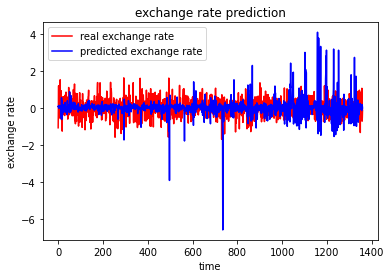

Tomorrow's exchange rate : [-0.01159671] CAD/KRW


In [103]:
# 외국/한국 환율 , 한국과 외국의 단기 이자율 차이, 한국과 외국의 물가 상승률 차이, 한국과 외국의 통화량 차이, 한국과 외국의 GDP 차이

dfx = merge_left[['ex', 'change', 'm1', 'price']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -16.85, 0.8499097242411886, 1.430517711171658], [-0.24978596968323694, 7.74, 0.8499097242411886, 1.430517711171658], [1.0561709260175527, 3.83, 0.8499097242411886, 1.430517711171658], [-0.7224004076616426, 8.74, 0.8499097242411886, 1.430517711171658], [-0.5475040257649009, -6.16, 0.8499097242411886, 1.430517711171658]] -> [-0.12852169689118986]
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 5, 5)              200       
                                                                 
 lstm_23 (LSTM)              (None, 5)                 220       
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
________________

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-18 11:38:52.018722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:38:52.230623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:38:52.275912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:38:52.338973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 11:38:52.422958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 4s 11ms/step - loss: 0.4656
Epoch 2/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4631
Epoch 3/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4623
Epoch 4/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4622
Epoch 5/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4613
Epoch 6/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4612
Epoch 7/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4602
Epoch 8/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4595
Epoch 9/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4590
Epoch 10/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4583
Epoch 11/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4566
Epoch 12/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4551
Epoch 13/600


318/318 [==============================] - 3s 10ms/step - loss: 0.3481
Epoch 195/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3457
Epoch 196/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3466
Epoch 197/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3470
Epoch 198/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3468
Epoch 199/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3453
Epoch 200/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3458
Epoch 201/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3461
Epoch 202/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3463
Epoch 203/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3452
Epoch 204/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3443
Epoch 205/600
318/318 [==============================] - 3s 10ms/step - loss: 0

318/318 [==============================] - 3s 10ms/step - loss: 0.3163
Epoch 387/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3166
Epoch 388/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3172
Epoch 389/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3172
Epoch 390/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3177
Epoch 391/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3165
Epoch 392/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3176
Epoch 393/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3177
Epoch 394/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3159
Epoch 395/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3150
Epoch 396/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3162
Epoch 397/600
318/318 [==============================] - 3s 10ms/step - loss: 0

318/318 [==============================] - 3s 10ms/step - loss: 0.2941
Epoch 579/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2934
Epoch 580/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2935
Epoch 581/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2946
Epoch 582/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2935
Epoch 583/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2925
Epoch 584/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2935
Epoch 585/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2934
Epoch 586/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2943
Epoch 587/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2934
Epoch 588/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2936
Epoch 589/600
318/318 [==============================] - 3s 10ms/step - loss: 0

2022-05-18 12:11:15.245700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 12:11:15.334161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 12:11:15.445037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


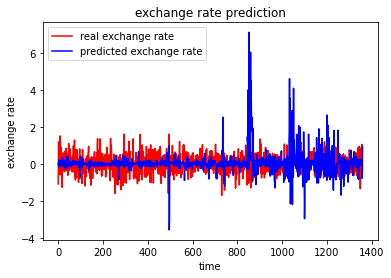

Tomorrow's exchange rate : [0.9146609] CAD/KRW


In [104]:
dfx = merge_left[['ex', 'change', 'm1', 'price']] # 반복횟수 600
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=600, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -16.85], [-0.24978596968323694, 7.74], [1.0561709260175527, 3.83], [-0.7224004076616426, 8.74], [-0.5475040257649009, -6.16]] -> [-0.12852169689118986]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 5)              160       
                                                                 
 lstm_5 (LSTM)               (None, 5)                 220       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-18 16:16:28.605474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 16:16:28.844040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 16:16:28.895745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 16:16:28.963122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 16:16:29.042761: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 4s 9ms/step - loss: 0.4671
Epoch 2/300
318/318 [==============================] - 3s 9ms/step - loss: 0.4647
Epoch 3/300
318/318 [==============================] - 3s 9ms/step - loss: 0.4638
Epoch 4/300
318/318 [==============================] - 3s 9ms/step - loss: 0.4632
Epoch 5/300
318/318 [==============================] - 3s 9ms/step - loss: 0.4627
Epoch 6/300
318/318 [==============================] - 3s 9ms/step - loss: 0.4624
Epoch 7/300
318/318 [==============================] - 3s 9ms/step - loss: 0.4620
Epoch 8/300
318/318 [==============================] - 3s 9ms/step - loss: 0.4611
Epoch 9/300
318/318 [==============================] - 3s 9ms/step - loss: 0.4613
Epoch 10/300
318/318 [==============================] - 3s 9ms/step - loss: 0.4608
Epoch 11/300
318/318 [==============================] - 3s 9ms/step - loss: 0.4601
Epoch 12/300
318/318 [==============================] - 3s 9ms/step - loss: 0.4602
Epoch 13/300
318/318 [===

318/318 [==============================] - 3s 9ms/step - loss: 0.3340
Epoch 197/300
318/318 [==============================] - 3s 9ms/step - loss: 0.3336
Epoch 198/300
318/318 [==============================] - 3s 9ms/step - loss: 0.3334
Epoch 199/300
318/318 [==============================] - 3s 9ms/step - loss: 0.3335
Epoch 200/300
318/318 [==============================] - 3s 9ms/step - loss: 0.3332
Epoch 201/300
318/318 [==============================] - 3s 9ms/step - loss: 0.3331
Epoch 202/300
318/318 [==============================] - 3s 9ms/step - loss: 0.3327
Epoch 203/300
318/318 [==============================] - 3s 9ms/step - loss: 0.3326
Epoch 204/300
318/318 [==============================] - 3s 9ms/step - loss: 0.3317
Epoch 205/300
318/318 [==============================] - 3s 9ms/step - loss: 0.3316
Epoch 206/300
318/318 [==============================] - 3s 9ms/step - loss: 0.3316
Epoch 207/300
318/318 [==============================] - 3s 9ms/step - loss: 0.3314
Epoch 

2022-05-18 16:30:49.754474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 16:30:49.834479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 16:30:49.910765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


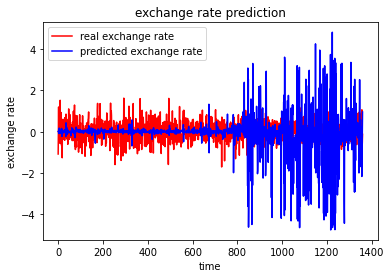

Tomorrow's exchange rate : [0.9490918] CAD/KRW


In [28]:
dfx = merge_left[['ex', 'change']] # 단기 
dfy = dfx[['ex']]

window_size = 5
data_size = 2

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -16.85], [-0.24978596968323694, 7.74], [1.0561709260175527, 3.83], [-0.7224004076616426, 8.74], [-0.5475040257649009, -6.16]] -> [-0.12852169689118986]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 5)              160       
                                                                 
 lstm_3 (LSTM)               (None, 5)                 220       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-18 15:39:24.146123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 15:39:24.340377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 15:39:24.407607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 15:39:24.453501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 15:39:24.582881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 4s 9ms/step - loss: 0.4661
Epoch 2/600
318/318 [==============================] - 3s 9ms/step - loss: 0.4648
Epoch 3/600
318/318 [==============================] - 3s 9ms/step - loss: 0.4633
Epoch 4/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4630
Epoch 5/600
318/318 [==============================] - 3s 9ms/step - loss: 0.4627
Epoch 6/600
318/318 [==============================] - 3s 9ms/step - loss: 0.4615
Epoch 7/600
318/318 [==============================] - 3s 9ms/step - loss: 0.4621
Epoch 8/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4610
Epoch 9/600
318/318 [==============================] - 3s 9ms/step - loss: 0.4613
Epoch 10/600
318/318 [==============================] - 3s 9ms/step - loss: 0.4607
Epoch 11/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4601
Epoch 12/600
318/318 [==============================] - 3s 9ms/step - loss: 0.4595
Epoch 13/600
318/318 [

318/318 [==============================] - 3s 9ms/step - loss: 0.3293
Epoch 197/600
318/318 [==============================] - 3s 9ms/step - loss: 0.3288
Epoch 198/600
318/318 [==============================] - 3s 9ms/step - loss: 0.3281
Epoch 199/600
318/318 [==============================] - 3s 9ms/step - loss: 0.3284
Epoch 200/600
318/318 [==============================] - 3s 9ms/step - loss: 0.3283
Epoch 201/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3284
Epoch 202/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3278
Epoch 203/600
318/318 [==============================] - 3s 9ms/step - loss: 0.3274
Epoch 204/600
318/318 [==============================] - 3s 9ms/step - loss: 0.3273
Epoch 205/600
318/318 [==============================] - 3s 9ms/step - loss: 0.3273
Epoch 206/600
318/318 [==============================] - 3s 9ms/step - loss: 0.3267
Epoch 207/600
318/318 [==============================] - 4s 13ms/step - loss: 0.3269
Epo

318/318 [==============================] - 3s 9ms/step - loss: 0.2938
Epoch 391/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2945
Epoch 392/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2936
Epoch 393/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2936
Epoch 394/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2943
Epoch 395/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2937
Epoch 396/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2930
Epoch 397/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2928
Epoch 398/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2931
Epoch 399/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2933
Epoch 400/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2931
Epoch 401/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2928
Epoch 

318/318 [==============================] - 3s 9ms/step - loss: 0.2774
Epoch 585/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2768
Epoch 586/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2773
Epoch 587/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2765
Epoch 588/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2779
Epoch 589/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2798
Epoch 590/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2778
Epoch 591/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2773
Epoch 592/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2772
Epoch 593/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2761
Epoch 594/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2764
Epoch 595/600
318/318 [==============================] - 3s 9ms/step - loss: 0.2777
Epoch 

2022-05-18 16:07:52.353327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 16:07:52.431508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 16:07:52.496700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


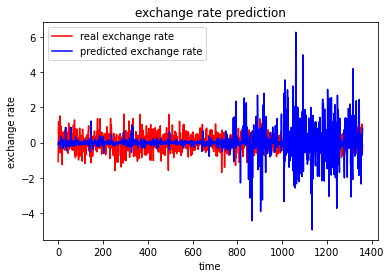

Tomorrow's exchange rate : [0.8054036] CAD/KRW


In [27]:
dfx = merge_left[['ex', 'change']]
dfy = dfx[['ex']]

window_size = 5
data_size = 2

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=600, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, 0.8499097242411886, 1.430517711171658], [-0.24978596968323694, 0.8499097242411886, 1.430517711171658], [1.0561709260175527, 0.8499097242411886, 1.430517711171658], [-0.7224004076616426, 0.8499097242411886, 1.430517711171658], [-0.5475040257649009, 0.8499097242411886, 1.430517711171658]] -> [-0.12852169689118986]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 5)              180       
                                                                 
 lstm_3 (LSTM)               (None, 5)                 220       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
__________________________________________________

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-18 17:19:44.547927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 17:19:44.805808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 17:19:44.843003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 17:19:44.893278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 17:19:44.953921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 4s 10ms/step - loss: 0.4668
Epoch 2/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4634
Epoch 3/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4622
Epoch 4/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4615
Epoch 5/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4606
Epoch 6/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4602
Epoch 7/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4594
Epoch 8/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4592
Epoch 9/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4580
Epoch 10/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4577
Epoch 11/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4566
Epoch 12/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4557
Epoch 13/300


318/318 [==============================] - 3s 10ms/step - loss: 0.3432
Epoch 195/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3435
Epoch 196/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3427
Epoch 197/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3423
Epoch 198/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3415
Epoch 199/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3424
Epoch 200/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3431
Epoch 201/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3419
Epoch 202/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3406
Epoch 203/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3413
Epoch 204/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3406
Epoch 205/300
318/318 [==============================] - 3s 11ms/step - loss: 0

2022-05-18 17:35:51.917475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 17:35:51.997056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 17:35:52.054040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


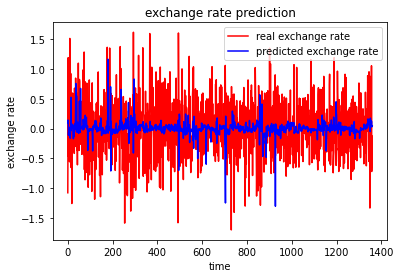

Tomorrow's exchange rate : [0.04819705] CAD/KRW


In [52]:
dfx = merge_left[['ex', 'm1', 'price']]
dfy = dfx[['ex']]

window_size = 5
data_size = 3

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, 0.8499097242411886, 1.430517711171658], [-0.24978596968323694, 0.8499097242411886, 1.430517711171658], [1.0561709260175527, 0.8499097242411886, 1.430517711171658], [-0.7224004076616426, 0.8499097242411886, 1.430517711171658], [-0.5475040257649009, 0.8499097242411886, 1.430517711171658]] -> [-0.12852169689118986]
Metal device set to: Apple M1


2022-05-18 19:29:16.932614: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-18 19:29:16.932877: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 5)              180       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600


/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-18 19:29:17.251674: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-18 19:29:17.863828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 19:29:18.062655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 19:29:18.130100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 19:29:18.200544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 19:29:18.293448: I tensorflow/c

318/318 [==============================] - 4s 10ms/step - loss: 0.4655
Epoch 2/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4632
Epoch 3/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4626
Epoch 4/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4615
Epoch 5/600
318/318 [==============================] - 3s 11ms/step - loss: 0.4611
Epoch 6/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4605
Epoch 7/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4601
Epoch 8/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4592
Epoch 9/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4590
Epoch 10/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4587
Epoch 11/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4581
Epoch 12/600
318/318 [==============================] - 3s 10ms/step - loss: 0.4559
Epoch 13/600


318/318 [==============================] - 3s 10ms/step - loss: 0.3503
Epoch 195/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3491
Epoch 196/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3498
Epoch 197/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3507
Epoch 198/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3494
Epoch 199/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3491
Epoch 200/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3483
Epoch 201/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3481
Epoch 202/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3478
Epoch 203/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3485
Epoch 204/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3466
Epoch 205/600
318/318 [==============================] - 3s 10ms/step - loss: 0

318/318 [==============================] - 3s 10ms/step - loss: 0.3127
Epoch 387/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3103
Epoch 388/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3122
Epoch 389/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3114
Epoch 390/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3105
Epoch 391/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3105
Epoch 392/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3107
Epoch 393/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3097
Epoch 394/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3094
Epoch 395/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3094
Epoch 396/600
318/318 [==============================] - 3s 10ms/step - loss: 0.3095
Epoch 397/600
318/318 [==============================] - 3s 10ms/step - loss: 0

318/318 [==============================] - 3s 10ms/step - loss: 0.2880
Epoch 579/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2876
Epoch 580/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2883
Epoch 581/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2887
Epoch 582/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2870
Epoch 583/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2865
Epoch 584/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2873
Epoch 585/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2878
Epoch 586/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2879
Epoch 587/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2873
Epoch 588/600
318/318 [==============================] - 3s 10ms/step - loss: 0.2869
Epoch 589/600
318/318 [==============================] - 3s 10ms/step - loss: 0

2022-05-18 20:01:08.115415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 20:01:08.180657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-18 20:01:08.228616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


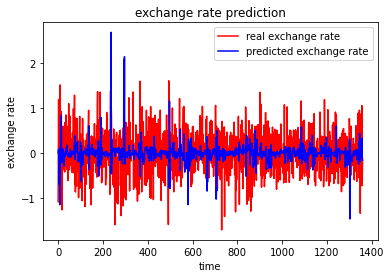

Tomorrow's exchange rate : [-0.15558712] CAD/KRW


In [26]:
dfx = merge_left[['ex', 'm1', 'price']]
dfy = dfx[['ex']]

window_size = 5
data_size = 3

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=600, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -16.85, 0.8499097242411886, 1.430517711171658], [-0.24978596968323694, 7.74, 0.8499097242411886, 1.430517711171658], [1.0561709260175527, 3.83, 0.8499097242411886, 1.430517711171658], [-0.7224004076616426, 8.74, 0.8499097242411886, 1.430517711171658], [-0.5475040257649009, -6.16, 0.8499097242411886, 1.430517711171658]] -> [-0.12852169689118986]
Metal device set to: Apple M1


2022-05-19 09:09:42.598092: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-19 09:09:42.598405: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 5)              200       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300


2022-05-19 09:09:42.920949: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-19 09:09:43.523909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:09:43.713773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:09:43.774363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:09:43.836779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:09:43.928627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 4s 10ms/step - loss: 0.4641
Epoch 2/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4626
Epoch 3/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4620
Epoch 4/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4620
Epoch 5/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4613
Epoch 6/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4609
Epoch 7/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4605
Epoch 8/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4599
Epoch 9/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4593
Epoch 10/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4583
Epoch 11/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4571
Epoch 12/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4569
Epoch 13/300


318/318 [==============================] - 3s 10ms/step - loss: 0.3388
Epoch 195/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3391
Epoch 196/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3405
Epoch 197/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3372
Epoch 198/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3370
Epoch 199/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3376
Epoch 200/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3415
Epoch 201/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3376
Epoch 202/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3380
Epoch 203/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3366
Epoch 204/300
318/318 [==============================] - 3s 10ms/step - loss: 0.3356
Epoch 205/300
318/318 [==============================] - 3s 10ms/step - loss: 0

2022-05-19 09:25:31.462250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:25:31.525202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:25:31.584191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


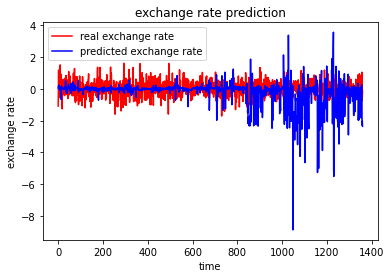

Tomorrow's exchange rate : [-2.358286] CAD/KRW


In [26]:
dfx = merge_left[['ex', 'change', 'm1', 'price']]
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='Adam', loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -16.85, 0.8499097242411886, 1.430517711171658], [-0.24978596968323694, 7.74, 0.8499097242411886, 1.430517711171658], [1.0561709260175527, 3.83, 0.8499097242411886, 1.430517711171658], [-0.7224004076616426, 8.74, 0.8499097242411886, 1.430517711171658], [-0.5475040257649009, -6.16, 0.8499097242411886, 1.430517711171658]] -> [-0.12852169689118986]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 5)              200       
                                                                 
 lstm_3 (LSTM)               (None, 5)                 220       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-19 09:28:08.808414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:28:09.005363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/318 [..............................] - ETA: 5:59 - loss: 0.4969

2022-05-19 09:28:09.063067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:28:09.116092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:28:09.190561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 4s 10ms/step - loss: 0.4636
Epoch 2/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4630
Epoch 3/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4628
Epoch 4/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4626
Epoch 5/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4624
Epoch 6/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4623
Epoch 7/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4622
Epoch 8/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4621
Epoch 9/300
318/318 [==============================] - 3s 11ms/step - loss: 0.4620
Epoch 10/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4619
Epoch 11/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4618
Epoch 12/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4618
Epoch 13/300


318/318 [==============================] - 3s 10ms/step - loss: 0.4373
Epoch 195/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4371
Epoch 196/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4369
Epoch 197/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4366
Epoch 198/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4365
Epoch 199/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4363
Epoch 200/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4360
Epoch 201/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4359
Epoch 202/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4355
Epoch 203/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4353
Epoch 204/300
318/318 [==============================] - 3s 10ms/step - loss: 0.4352
Epoch 205/300
318/318 [==============================] - 3s 10ms/step - loss: 0

2022-05-19 09:43:46.353802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:43:46.417792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:43:46.461459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


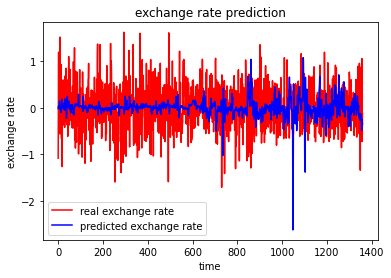

Tomorrow's exchange rate : [-0.34104663] CAD/KRW


In [27]:
dfx = merge_left[['ex', 'change', 'm1', 'price']]
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -16.85, 0.8499097242411886, 1.430517711171658], [-0.24978596968323694, 7.74, 0.8499097242411886, 1.430517711171658], [1.0561709260175527, 3.83, 0.8499097242411886, 1.430517711171658], [-0.7224004076616426, 8.74, 0.8499097242411886, 1.430517711171658], [-0.5475040257649009, -6.16, 0.8499097242411886, 1.430517711171658]] -> [-0.12852169689118986]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 5)              200       
                                                                 
 lstm_5 (LSTM)               (None, 5)                 220       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________

/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-19 09:43:47.747215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:43:48.082479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:43:48.119087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/318 [..............................] - ETA: 8:19 - loss: 0.0000e+00

2022-05-19 09:43:48.362839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:43:48.444670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 5s 10ms/step - loss: 0.0000e+00
Epoch 2/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 3/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 4/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 5/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 6/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 7/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 8/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 9/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 10/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 11/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 12/300
318/318 [==============================]

318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 187/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 188/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 189/300
318/318 [==============================] - 3s 11ms/step - loss: 0.0000e+00
Epoch 190/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 191/300
318/318 [==============================] - 3s 11ms/step - loss: 0.0000e+00
Epoch 192/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 193/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 194/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 195/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 196/300
318/318 [==============================] - 3s 10ms/step - loss: 0.0000e+00
Epoch 197/300
318/318 [============

2022-05-19 09:59:48.435227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:59:48.510236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-19 09:59:48.585146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


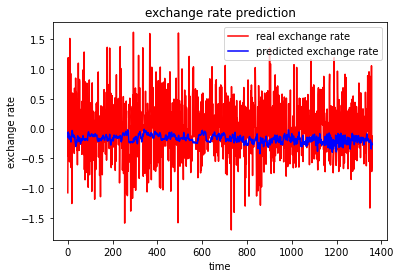

Tomorrow's exchange rate : [-0.2682267] CAD/KRW


In [28]:
dfx = merge_left[['ex', 'change', 'm1', 'price']]
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='tanh', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='tanh'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

In [ ]:
dfx = merge_left[['ex', 'change', 'm1', 'price']] # 반복횟수 300
dfy = dfx[['ex']]

window_size = 5
data_size = 4

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=5, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(LSTM(units=5, activation='relu'))
model.add(Dense(units=1))
model.summary()

optimizer = optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# model.compile(optimizer=adam, loss='mean_squared_error')
model.fit(train_x, train_y, epochs=300, batch_size=10)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real exchange rate')
plt.plot(pred_y, color='blue', label='predicted exchange rate')
plt.title('exchange rate prediction')
plt.xlabel('time')
plt.ylabel('exchange rate')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's exchange rate :", merge_left['ex'].iloc[-1] * pred_y[-1] / dfy.ex.iloc[-1], 'CAD/KRW')

[[0.8778614320114595, -16.85, 0.8499097242411886, 1.430517711171658], [-0.24978596968323694, 7.74, 0.8499097242411886, 1.430517711171658], [1.0561709260175527, 3.83, 0.8499097242411886, 1.430517711171658], [-0.7224004076616426, 8.74, 0.8499097242411886, 1.430517711171658], [-0.5475040257649009, -6.16, 0.8499097242411886, 1.430517711171658]] -> [-0.12852169689118986]
Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 5)              200       
                                                                 
 lstm_1 (LSTM)               (None, 5)                 220       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 426
Trainable params: 426
Non-trainable

2022-05-19 11:27:13.827906: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-19 11:27:13.828225: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/yuseonjong/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-19 11:27:14.004630: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-19 11:27:14.483654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is ena

318/318 [==============================] - 28s 86ms/step - loss: 0.4635
Epoch 2/300
318/318 [==============================] - 23s 71ms/step - loss: 0.4611
Epoch 3/300
318/318 [==============================] - 23s 73ms/step - loss: 0.4571
Epoch 4/300
318/318 [==============================] - 22s 70ms/step - loss: 0.4531
Epoch 5/300
318/318 [==============================] - 23s 71ms/step - loss: 0.4479
Epoch 6/300
318/318 [==============================] - 23s 74ms/step - loss: 0.4437
Epoch 7/300
318/318 [==============================] - 24s 74ms/step - loss: 0.4378
Epoch 8/300
318/318 [==============================] - 25s 78ms/step - loss: 0.4350
Epoch 9/300
318/318 [==============================] - 24s 76ms/step - loss: 0.4310
Epoch 10/300
318/318 [==============================] - 24s 76ms/step - loss: 0.4267
Epoch 11/300
318/318 [==============================] - 24s 75ms/step - loss: 0.4221
Epoch 12/300
318/318 [==============================] - 24s 75ms/step - loss: 0.4189
E